In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Movies.csv", encoding = "latin-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [23]:
df = df.dropna(subset=['Rating'])
df = df.dropna(subset = ["Duration"])
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')

In [19]:
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


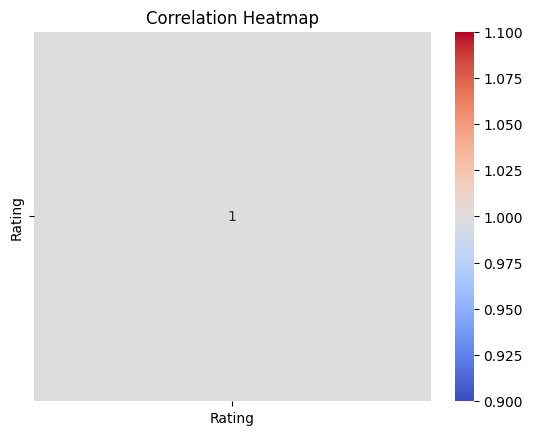

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

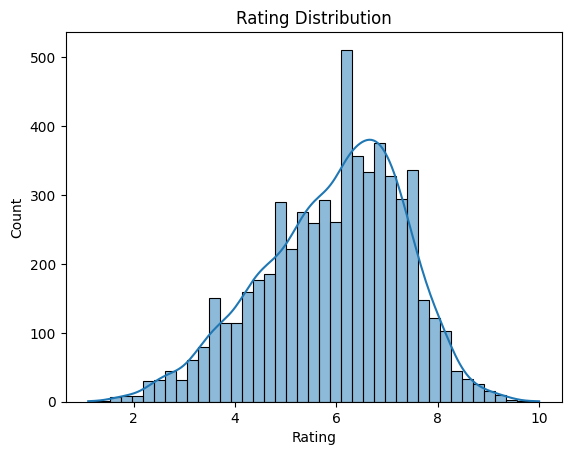

In [25]:
sns.histplot(df['Rating'], kde=True)
plt.title("Rating Distribution")
plt.show()

In [33]:
# Initialize LabelEncoders
le_Genre = LabelEncoder()
le_Director = LabelEncoder()
le_Actor1 = LabelEncoder()
le_Actor2 = LabelEncoder()
le_Actor3 = LabelEncoder()

# Apply encoding
df['Genre_encoded'] = le_Genre.fit_transform(df['Genre'])
df['Director_encoded'] = le_Director.fit_transform(df['Director'])
df['Actor1_encoded'] = le_Actor1.fit_transform(df['Actor 1'])
df['Actor2_encoded'] = le_Actor2.fit_transform(df['Actor 2'])
df['Actor3_encoded'] = le_Actor3.fit_transform(df['Actor 3'])


In [35]:
X = df[['Genre_encoded', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.8406047650301007
Root Mean Squared Error (RMSE): 1.3566888976585976
R² Score: 0.010702236379191543


In [41]:
# Example input: encoded genre, director, and actors
# You must use the same label encoders used during training!

new_movie = {
    'Genre': 'Action',
    'Director': 'Rajkumar Hirani',
    'Actor_1': 'Aamir Khan',
    'Actor_2': 'Anushka Sharma',
    'Actor_3': 'Boman Irani'
}

# Encode using the same encoders
new_input = [[
    le_Genre.transform([new_movie['Genre']])[0],
    le_Director.transform([new_movie['Director']])[0],
    le_Actor1.transform([new_movie['Actor_1']])[0],
    le_Actor2.transform([new_movie['Actor_2']])[0],
    le_Actor3.transform([new_movie['Actor_3']])[0],
]]

# Predict
predicted_rating = model.predict(new_input)[0]
print("Predicted Rating:", predicted_rating)


Predicted Rating: 5.330745015751512


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
